[[0. 1.]
 [1. 1.]
 [2. 1.]
 [3. 1.]
 [4. 1.]]
1.4200000000000004 -2.720000000000001


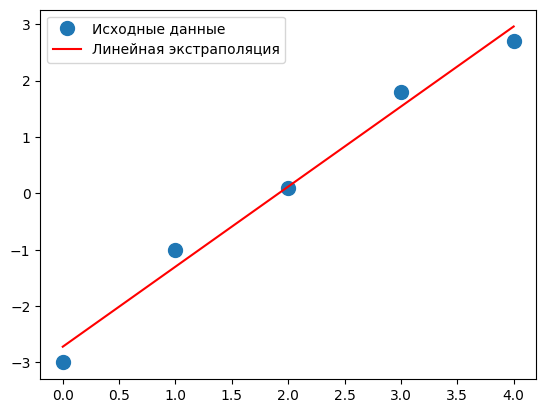

In [19]:
#задание 1
""" полином 1 степени """
import numpy as np
import matplotlib.pyplot as plt

x = np.arange(0, 5)
y = np.array([-3, -1, 0.1, 1.8, 2.7])
A = np.vstack([x, np.ones(len(x))]).T
print(A)

m, c = np.linalg.lstsq(A, y, rcond=None)[0]
print(m, c)

plt.plot(x, y, 'o', label='Исходные данные', markersize=10)
plt.plot(x, m*x + c, 'r', label='Линейная экстраполяция')
plt.legend()
plt.show()

[-7.42591672 -6.58898469 -5.06219376 -3.90535368 -3.00689405 -2.19210869
 -1.7799848  -0.83860965 -0.02940877  1.18639483  2.04441145  3.10779496
  3.0296054   4.32927246  5.7244703   5.69108369  6.98717558]
[48.83884051 37.44890922 27.33424722 18.77236973 11.75878726  6.7730951
  3.08713687  0.50052494 -0.11916915  0.42783702  3.16294092  6.68468687
 11.99126226 18.9529061  27.1796913  37.87846152 48.86522665]


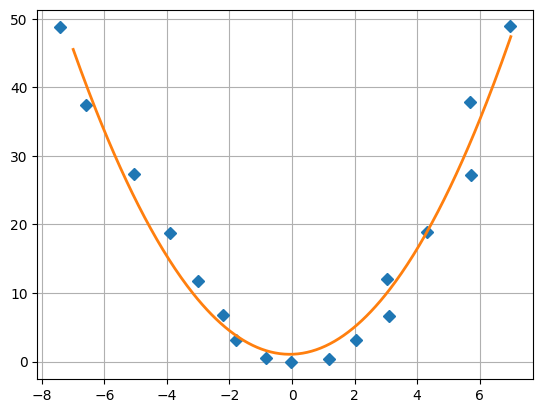

In [20]:
#задание 1
""" полином 2 степени """
import numpy as np
import matplotlib.pyplot as plt

delta=1.0
x = np.linspace(-7, 7, 17)
y = x**2 + delta*(np.random.rand(17)-0.5)
x += delta*(np.random.rand(17)-0.5)

x.tofile('xdata.txt', '\n')
y.tofile('ydata.txt', '\n')

x = np.fromfile('xdata.txt', float, sep='\n')
y = np.fromfile('ydata.txt', float, sep='\n')
print(x, y, sep='\n')

m = np.vstack((x**2, x, np.ones(17))).T
s = np.linalg.lstsq(m, y, rcond=None)[0]
x_prec = np.linspace(-7, 7, 289)

plt.plot(x, y, 'D')
plt.plot(x_prec, s[0]*x_prec**2 + s[1]*x_prec+s[2], '-', lw=2)
plt.grid()
plt.savefig('парабола.png')

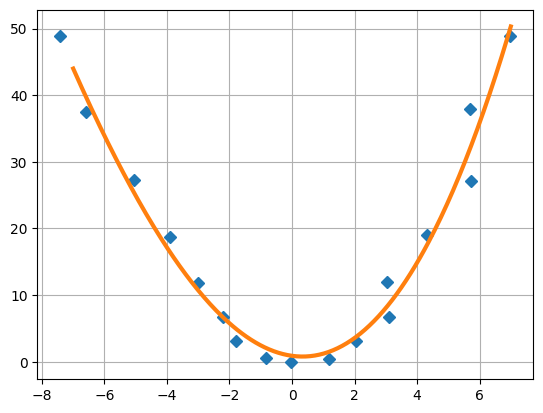

In [21]:
#задание 1
""" полином 3 степени """
import numpy as np
import matplotlib.pyplot as plt

m = np.vstack((x**3, x**2, x, np.ones(17))).T
s = np.linalg.lstsq(m, y, rcond=None)[0]
x_prec = np.linspace(-7, 7, 289)

plt.plot(x, y, 'D')
plt.plot(x_prec, s[0]*x_prec**3+s[1]*x_prec**2+s[2]*x_prec+s[3], '-', lw=3)
plt.grid()
plt.savefig('полином 3-й степени.png')

[0.50045176 0.99824656]
0.00011766099924192481
0.1816925468055268


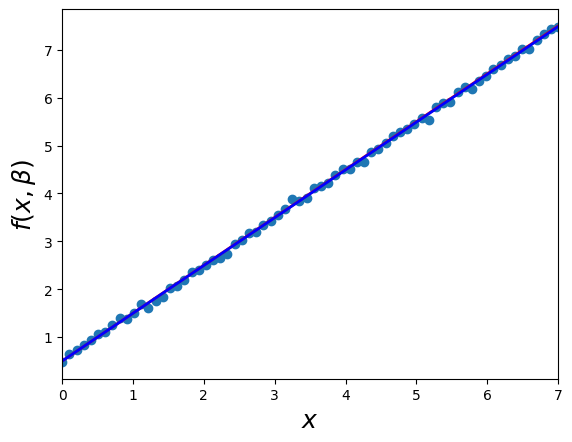

In [32]:
#задание 2
""" 1 функция """
import numpy as np
import scipy as sp

import matplotlib.pyplot as plt
from scipy import linalg
from scipy.optimize import curve_fit

beta = (0.5, 1)
def f(x, b0, b1):
    return b0 + b1*x

xdata = np.linspace(0, 7, 70)
y = f(xdata, *beta)

ydata = y + 0.05*np.random.randn(len(xdata))
beta_opt, beta_cov = sp.optimize.curve_fit(f, xdata, ydata)
print(beta_opt)

lin_dev = sum(beta_cov[0])
print(lin_dev)

residuals = ydata - f(xdata, *beta_opt)
fres = sum(residuals**2)
print(fres)

fig, ax = plt.subplots()
ax.scatter(xdata, ydata)
ax.plot(xdata, y, 'r', lw=2)
ax.plot(xdata, f(xdata, *beta_opt), 'b', lw=2)
ax.set_xlim(0, 7)
ax.set_xlabel(r'$x$', fontsize=18)
ax.set_ylabel(r'$f(x, \beta)$', fontsize=18)
plt.show()

[0.51719303 1.48767089 1.00142341]
0.00017727888871780015
0.1956115270948319


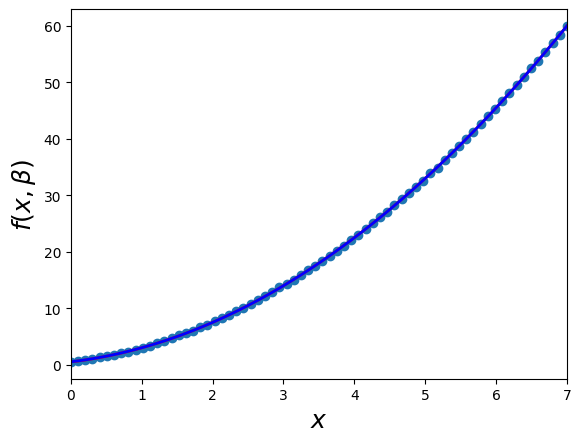

In [33]:
#задание 2
""" 2 функция """
import numpy as np
import scipy as sp

import matplotlib.pyplot as plt
from scipy import linalg
from scipy.optimize import curve_fit

beta = (0.5, 1.5, 1.0)
def f(x, b0, b1, b2):
    return b0 + b1*x + b2*(x**2)

xdata = np.linspace(0, 7, 70)
y = f(xdata, *beta)

ydata = y + 0.05*np.random.randn(len(xdata))
beta_opt, beta_cov = sp.optimize.curve_fit(f, xdata, ydata)
print(beta_opt)

lin_dev = sum(beta_cov[0])
print(lin_dev)

residuals = ydata - f(xdata, *beta_opt)
fres = sum(residuals**2)
print(fres)

fig, ax = plt.subplots()
ax.scatter(xdata, ydata)
ax.plot(xdata, y, 'r', lw=2)
ax.plot(xdata, f(xdata, *beta_opt), 'b', lw=2)
ax.set_xlim(0, 7)
ax.set_xlabel(r'$x$', fontsize=18)
ax.set_ylabel(r'$f(x, \beta)$', fontsize=18)
plt.show()

[2.99216027 6.00546009]
6.640517475849339e-05
0.14212961930608167


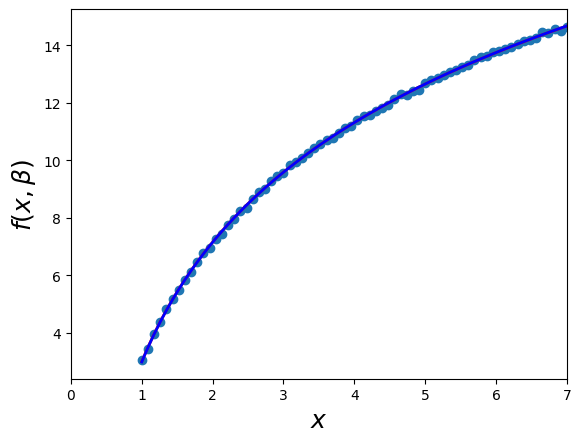

In [34]:
#задание 2
""" 3 функция """
import numpy as np
import scipy as sp

import matplotlib.pyplot as plt
from scipy import linalg
from scipy.optimize import curve_fit

beta = (3, 6)
def f(x, b0, b1):
    return b0 + b1*np.log(x)

xdata = np.linspace(1, 7, 70)
y = f(xdata, *beta)

ydata = y + 0.05*np.random.randn(len(xdata))
beta_opt, beta_cov = sp.optimize.curve_fit(f, xdata, ydata)
print(beta_opt)

lin_dev = sum(beta_cov[0])
print(lin_dev)

residuals = ydata - f(xdata, *beta_opt)
fres = sum(residuals**2)
print(fres)

fig, ax = plt.subplots()
ax.scatter(xdata, ydata)
ax.plot(xdata, y, 'r', lw=2)
ax.plot(xdata, f(xdata, *beta_opt), 'b', lw=2)
ax.set_xlim(0, 7)
ax.set_xlabel(r'$x$', fontsize=18)
ax.set_ylabel(r'$f(x, \beta)$', fontsize=18)
plt.show()

[3.0000021  5.99999964]
1.463889580720635e-11
0.1883070171964732


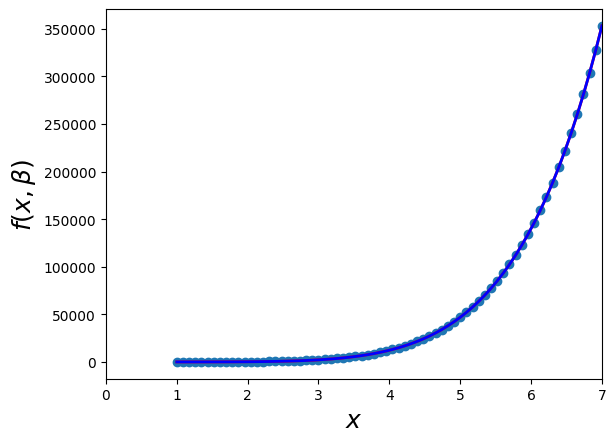

In [35]:
#задание 2
""" 4 функция """
import numpy as np
import scipy as sp

import matplotlib.pyplot as plt
from scipy import linalg
from scipy.optimize import curve_fit

beta = (3, 6)
def f(x, b0, b1):
    return b0 * (x**b1)

xdata = np.linspace(1, 7, 70)
y = f(xdata, *beta)

ydata = y + 0.05*np.random.randn(len(xdata))
beta_opt, beta_cov = sp.optimize.curve_fit(f, xdata, ydata)
print(beta_opt)

lin_dev = sum(beta_cov[0])
print(lin_dev)

residuals = ydata - f(xdata, *beta_opt)
fres = sum(residuals**2)
print(fres)

fig, ax = plt.subplots()
ax.scatter(xdata, ydata)
ax.plot(xdata, y, 'r', lw=2)
ax.plot(xdata, f(xdata, *beta_opt), 'b', lw=2)
ax.set_xlim(0, 7)
ax.set_xlabel(r'$x$', fontsize=18)
ax.set_ylabel(r'$f(x, \beta)$', fontsize=18)
plt.show()

   YearsExperience   Salary
0              1.1  39343.0
1              1.3  46205.0
2              1.5  37731.0
3              2.0  43525.0
4              2.2  39891.0
(30, 2)
       YearsExperience         Salary
count        30.000000      30.000000
mean          5.313333   76003.000000
std           2.837888   27414.429785
min           1.100000   37731.000000
25%           3.200000   56720.750000
50%           4.700000   65237.000000
75%           7.700000  100544.750000
max          10.500000  122391.000000


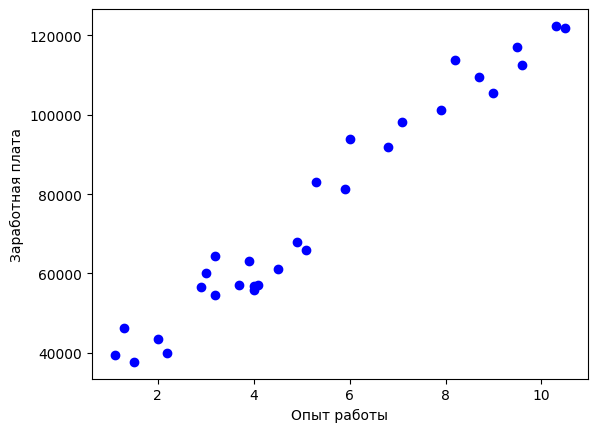

[[ 1.1]
 [ 1.3]
 [ 1.5]
 [ 2. ]
 [ 2.2]
 [ 2.9]
 [ 3. ]
 [ 3.2]
 [ 3.2]
 [ 3.7]
 [ 3.9]
 [ 4. ]
 [ 4. ]
 [ 4.1]
 [ 4.5]
 [ 4.9]
 [ 5.1]
 [ 5.3]
 [ 5.9]
 [ 6. ]
 [ 6.8]
 [ 7.1]
 [ 7.9]
 [ 8.2]
 [ 8.7]
 [ 9. ]
 [ 9.5]
 [ 9.6]
 [10.3]
 [10.5]]
[ 39343.  46205.  37731.  43525.  39891.  56642.  60150.  54445.  64445.
  57189.  63218.  55794.  56957.  57081.  61111.  67938.  66029.  83088.
  81363.  93940.  91738.  98273. 101302. 113812. 109431. 105582. 116969.
 112635. 122391. 121872.]
26780.09915062818
[9312.57512673]
     Actual      Predicted
0   37731.0   40748.961841
1  122391.0  122699.622956
2   57081.0   64961.657170
3   63218.0   63099.142145
4  116969.0  115249.562855
5  109431.0  107799.502753


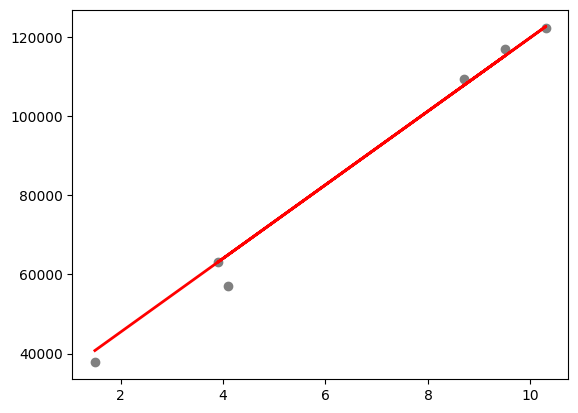

In [37]:
# задание 3
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas import DataFrame,Series
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

url="https://raw.githubusercontent.com/AnnaShestova/salary-years-simple-linear-regression/master/Salary_Data.csv"
df=pd.read_csv(url)

print(df.head(5))

print(df.shape)
print(df.describe())

plt.scatter(df['YearsExperience'],df['Salary'],color='b',label="данные опыта работы и ЗП")
plt.xlabel("Опыт работы")
plt.ylabel("Заработная плата")
plt.show()

X=df.iloc[:,:-1].values
y=df.iloc[:,1].values
print(X)
print(y)

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

regressor=LinearRegression()
regressor.fit(X_train,y_train)

print(regressor.intercept_)
print(regressor.coef_)

y_pred=regressor.predict(X_test)

datf=pd.DataFrame({'Actual':y_test,'Predicted':y_pred})
print(datf)

plt.scatter(X_test,y_test,color='gray')
plt.plot(X_test,y_pred,color='red',linewidth=2)
plt.show()

In [39]:
#задание 4

import pandas as pd
from pandas import read_csv
import numpy as np
import seaborn as sn 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

url = r'https://raw.githubusercontent.com/aniruddhachoudhury/Red-Wine-Quality/master/winequality-red.csv'
df = read_csv(url)

df_pH = df['pH']

df_alc_qual = [df['alcohol'], df['quality']]

#print(df_pH.head(5), df_alc_qual.head(5), sep='\n')

new_df_pH = np.array(df_pH)
new_df_pH = new_df_pH.transpose()

new_df_alc_qual = np.array(df_alc_qual)
new_df_alc_qual = new_df_alc_qual.transpose()

df1 = pd.DataFrame(new_df_pH)
df2 = pd.DataFrame(new_df_alc_qual)

df1 = df1.rename(columns = {0: 'pH'}, inplace=False)
df2 = df2.rename(columns = {0: 'alcohol', 1: 'quality'}, inplace=False)

frames = [df1, df2]

dataset = pd.concat(frames, axis=1, join="inner")

print(dataset.head(5))

print(dataset.shape)

df_pH = dataset['pH']
df_alc_qual = dataset[['alcohol', 'quality']]

x_train, x_test, y_train, y_test = train_test_split(df_alc_qual, df_pH, test_size=0.2, random_state=42)

regressor = LinearRegression()
regressor.fit(x_train, y_train)

coeff_df = pd.DataFrame(regressor.coef_, df_alc_qual.columns, columns=['Coefficient'])

print(coeff_df)

y_pred = regressor.predict(x_test)

df_final = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})

print(df_final)

print('Mean Squared Error: ', metrics.mean_squared_error(y_test, y_pred))

     pH  alcohol  quality
0  3.51      9.4      5.0
1  3.20      9.8      5.0
2  3.26      9.8      5.0
3  3.16      9.8      6.0
4  3.51      9.4      5.0
(1599, 3)
         Coefficient
alcohol     0.044944
quality    -0.036340
      Actual  Predicted
803     3.24   3.261214
124     3.39   3.293059
350     3.28   3.274698
682     3.33   3.306543
1326    3.39   3.306159
...      ...        ...
1259    3.44   3.337620
1295    3.20   3.293059
1155    3.15   3.306543
963     3.15   3.333125
704     3.29   3.338388

[320 rows x 2 columns]
Mean Squared Error:  0.022701481548260245
